### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data sources

In [4]:
assessments_raw = pd.read_csv("dataset/assessments.csv")
courses_raw = pd.read_csv("dataset/courses.csv")
student_assessment_raw = pd.read_csv("dataset/studentAssessment.csv")
student_info_raw = pd.read_csv("dataset/studentInfo.csv")
student_registration_raw = pd.read_csv("dataset/studentRegistration.csv")
# If this is failing, ensure that you have downloaded the dataset and copied studentVle.csv 
# to the dataset folder.
student_vle_raw = pd.read_csv("dataset/studentVle.csv") 
vle_raw = pd.read_csv("dataset/vle.csv")

In [3]:
student_vle_raw.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


I had skipped over this detail before, but... there's negative date values! Do we want to remove them from our overall data, or keep them? It might be interesting to see which students interacted with course pages before the class even started (like visiting the course homepage to remind themselves about the primary details of the class?), or it might add a weird variable. Thoughts? -Susannah

Good catch - I think it would be interesting for feature engineering (maybe just a boolean if they interacted over a certain amount before the course began). It might be an indication of student eagerness/engagement with the course that could differentiate between a student's likelihood to pass.  -Mike

# Exploratory Data Analysis

## Describe columns

In [4]:
assessments_raw.describe(include='all')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
count,206,206,206.000000,206,195.000000,206.000000
unique,7,4,NaN,3,NaN,NaN
top,FFF,2014J,NaN,TMA,NaN,NaN
freq,52,57,NaN,106,NaN,NaN
mean,NaN,NaN,26473.975728,NaN,145.005128,20.873786
std,NaN,NaN,10098.625521,NaN,76.001119,30.384224
min,NaN,NaN,1752.000000,NaN,12.000000,0.000000
25%,NaN,NaN,15023.250000,NaN,71.000000,0.000000
50%,NaN,NaN,25364.500000,NaN,152.000000,12.500000
75%,NaN,NaN,34891.750000,NaN,222.000000,24.250000


In [5]:
courses_raw.describe(include='all')

,code_module,code_presentation,module_presentation_length
count,22,22,22.000000
unique,7,4,NaN
top,BBB,2014J,NaN
freq,4,7,NaN
mean,NaN,NaN,255.545455
std,NaN,NaN,13.654677
min,NaN,NaN,234.000000
25%,NaN,NaN,241.000000
50%,NaN,NaN,261.500000
75%,NaN,NaN,268.000000


In [6]:
student_assessment_raw.describe(include='all')

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [7]:
student_info_raw.describe(include='all')

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,32593,32593,3.259300e+04,32593,32593,32593,31482,32593,32593.000000,32593.000000,32593,32593
unique,7,4,NaN,2,13,5,10,3,NaN,NaN,2,4
top,BBB,2014J,NaN,M,Scotland,A Level or Equivalent,20-30%,0-35,NaN,NaN,N,Pass
freq,7909,11260,NaN,17875,3446,14045,3654,22944,NaN,NaN,29429,12361
mean,NaN,NaN,7.066877e+05,NaN,NaN,NaN,NaN,NaN,0.163225,79.758691,NaN,NaN
std,NaN,NaN,5.491673e+05,NaN,NaN,NaN,NaN,NaN,0.479758,41.071900,NaN,NaN
min,NaN,NaN,3.733000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN,NaN
25%,NaN,NaN,5.085730e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,5.903100e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
75%,NaN,NaN,6.444530e+05,NaN,NaN,NaN,NaN,NaN,0.000000,120.000000,NaN,NaN


Noticing that ~3k students are listed as having a disability. I wonder what the context is for this (is this a standard amount? Less/more than normal?)

In [8]:
student_registration_raw.describe(include='all')

,code_module,code_presentation,id_student,date_registration,date_unregistration
count,32593,32593,3.259300e+04,32548.000000,10072.000000
unique,7,4,NaN,NaN,NaN
top,BBB,2014J,NaN,NaN,NaN
freq,7909,11260,NaN,NaN,NaN
mean,NaN,NaN,7.066877e+05,-69.411300,49.757645
std,NaN,NaN,5.491673e+05,49.260522,82.460890
min,NaN,NaN,3.733000e+03,-322.000000,-365.000000
25%,NaN,NaN,5.085730e+05,-100.000000,-2.000000
50%,NaN,NaN,5.903100e+05,-57.000000,27.000000
75%,NaN,NaN,6.444530e+05,-29.000000,109.000000


Another interesting negative date situation here. It makes sense that most registration dates are negative, as most students will have registered before the class term begins. I'm not sure what's going on where the minimum unregistration value is lower than the minimum registration value, and that may hint at some additional data cleaning needs. -Susannah

In [9]:
student_vle_raw.describe(include='all')

,code_module,code_presentation,id_student,id_site,date,sum_click
count,10655280,10655280,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
unique,7,4,NaN,NaN,NaN,NaN
top,FFF,2014J,NaN,NaN,NaN,NaN
freq,4014499,3619452,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,NaN,NaN,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,NaN,NaN,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,NaN,NaN,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,NaN,NaN,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,NaN,NaN,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00


In [10]:
vle_raw.describe(include='all')

,id_site,code_module,code_presentation,activity_type,week_from,week_to
count,6.364000e+03,6364,6364,6364,1121.000000,1121.000000
unique,NaN,7,4,20,NaN,NaN
top,NaN,FFF,2013J,resource,NaN,NaN
freq,NaN,1967,1772,2660,NaN,NaN
mean,7.260991e+05,NaN,NaN,NaN,15.204282,15.214987
std,1.283151e+05,NaN,NaN,NaN,8.792865,8.779806
min,5.267210e+05,NaN,NaN,NaN,0.000000,0.000000
25%,6.615928e+05,NaN,NaN,NaN,8.000000,8.000000
50%,7.300965e+05,NaN,NaN,NaN,15.000000,15.000000
75%,8.140162e+05,NaN,NaN,NaN,22.000000,22.000000


Appears to be missing data for the <code>week_from</code> and <code>week_to</code> variables. Perhaps missing data indicates something (like there is not a strict schedule for this assignment)?

## Histograms and Bar Charts

### Helper EDA functions

In [42]:
def explore_numeric_hist(df, col_name, axis, display_labels=True):
    _,_, patches = axis.hist(df[col_name])
    axis.set_title(col_name)
    axis.set_ylabel("count")

    if display_labels:
        add_labels(patches, axis)


def add_labels(patches, axis):
    # add in labels
    max_tick = max(np.abs(axis.get_yticks()))
    for p in patches:
        x,_ = p.get_xy()
        y = p.get_height()
        width = p.get_width()
        v_adjust = max_tick*0.01
        axis.text(x+width/2,y+ v_adjust,str(int(y)), ha='center')
    # increase y-axis limit to accomodate text
    ylim = axis.get_ylim()
    axis.set_ylim(ylim[0],ylim[1]*1.05)
    
def explore_bar(df, col_name, axis, display_labels=True):
    df[col_name].value_counts().plot(kind='bar',ax=axis)
    axis.set_title(col_name)
    axis.set_ylabel("count")
    
    # add in labels
    if display_labels:
        patches = axis.patches
        add_labels(patches, axis)

def explore_col(df, col_name, axis, display_labels=True):
    if (pd.api.types.is_string_dtype(df[col_name])):
        explore_bar(df, col_name, axis, display_labels)
        return
    if (pd.api.types.is_numeric_dtype(df[col_name])):
        explore_numeric_hist(df, col_name, axis, display_labels)
        return

def explore_df(df, num_display_cols=4, single_chart_width=6, single_chart_height=4, display_labels=True):
    #num_cols = num_display_cols
    num_cols_total = len(df.columns)
    num_display_rows = num_cols_total//num_display_cols +1
    fig, axs = plt.subplots(num_display_rows, num_display_cols)
    fig.set_size_inches((single_chart_width*num_display_cols, single_chart_height*num_display_rows))
    fig.subplots_adjust(hspace=1)

    axes_index = 0
    for col in df.columns:
        if num_cols_total >= num_display_cols:
            curr_axs = axs[axes_index//num_display_cols, axes_index%num_display_cols]
        else:
            curr_axs = axs[axes_index]
        explore_col(df, col, curr_axs, display_labels)
        axes_index += 1
    
    # remove excess plots
    for index in range(num_cols_total, num_display_cols*num_display_rows):
        if num_cols_total >= num_display_cols:
            curr_axs = axs[index//num_display_cols, index%num_display_cols]
        else:
            curr_axs = axs[index]
        fig.delaxes(curr_axs)



### Exploration of assessment data and notes

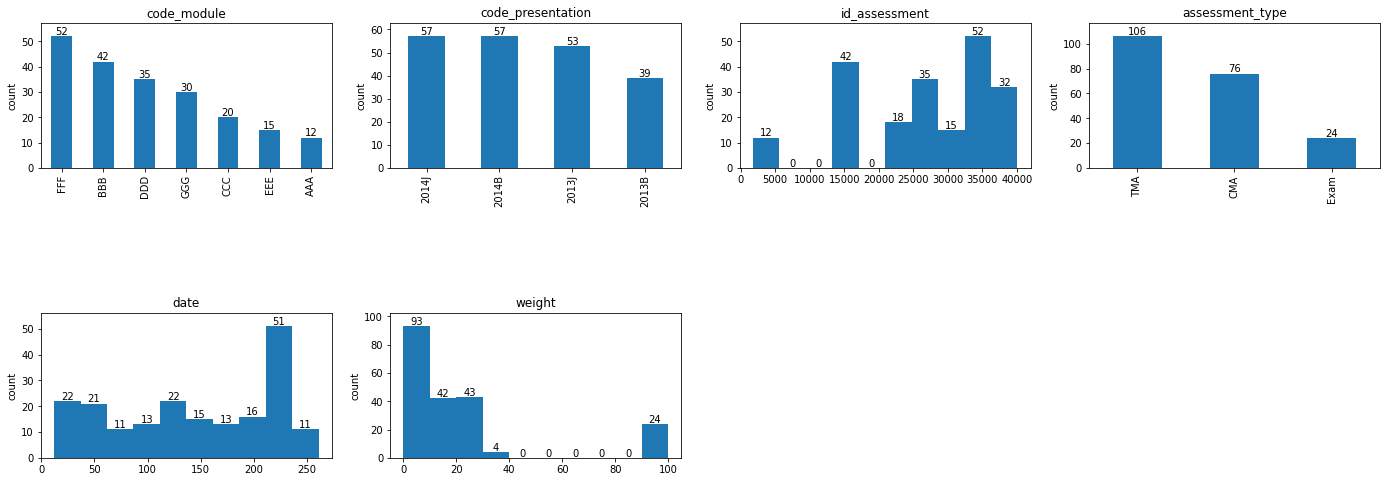

In [44]:
explore_df(assessments_raw)

It looks as some classes had many more assessments than others, particularly FFF, even when taking into account that it was 4 times (see histogram below). Perhaps it will be easier to predict student success/failure in classes with more assignments due to having more datapoints. Also, there appears to be a spike in due dates for the assignments toward the end of the courses.

### Exploration of courses data and notes

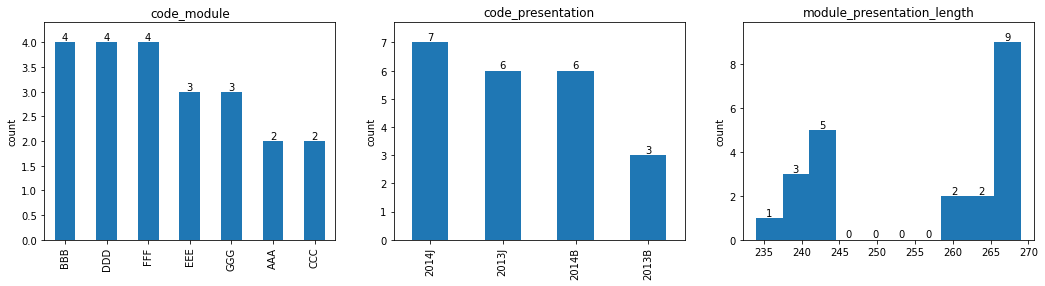

In [35]:
explore_df(courses_raw)

### Exploration of student_assessment data and notes

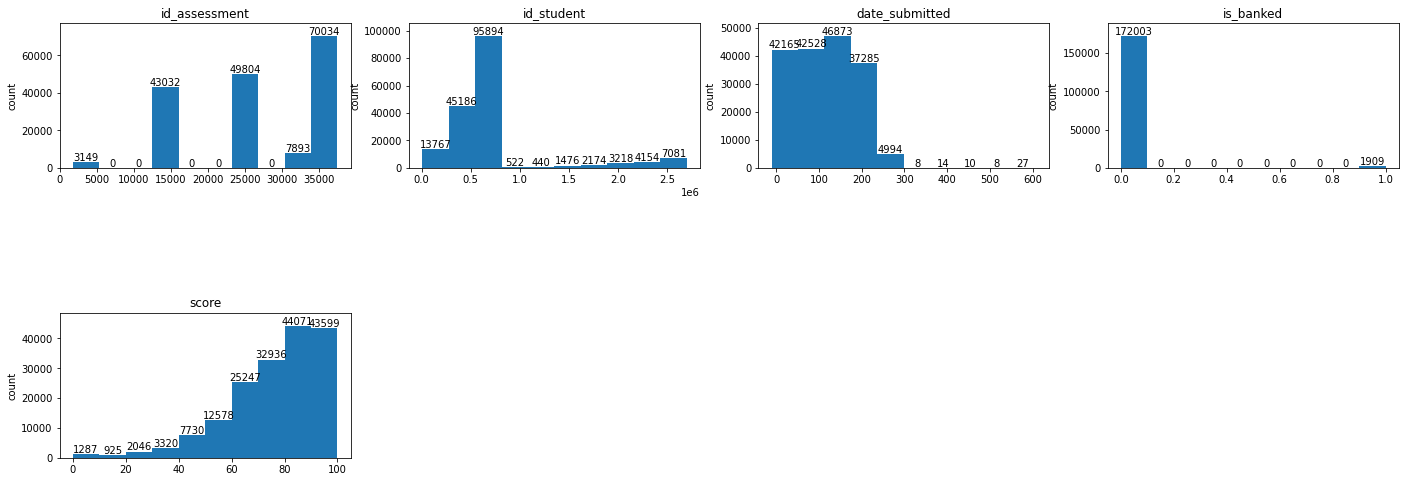

In [36]:
explore_df(student_assessment_raw)

Very few student assessments were marked as <code>is_banked</code>. I wonder if there are any differences between the <code> is_banked=0</code> and <code>is_banked=1</code>. Perhaps we will just drop this feature because it is so rare and might not be that descriptive towards student performance.

The scores seem to follow a negatively skewed distribution. Only 7578 out of 173,739 (4.37%) of assessments are failing (< 40).

### Exploration of student_info data and notes

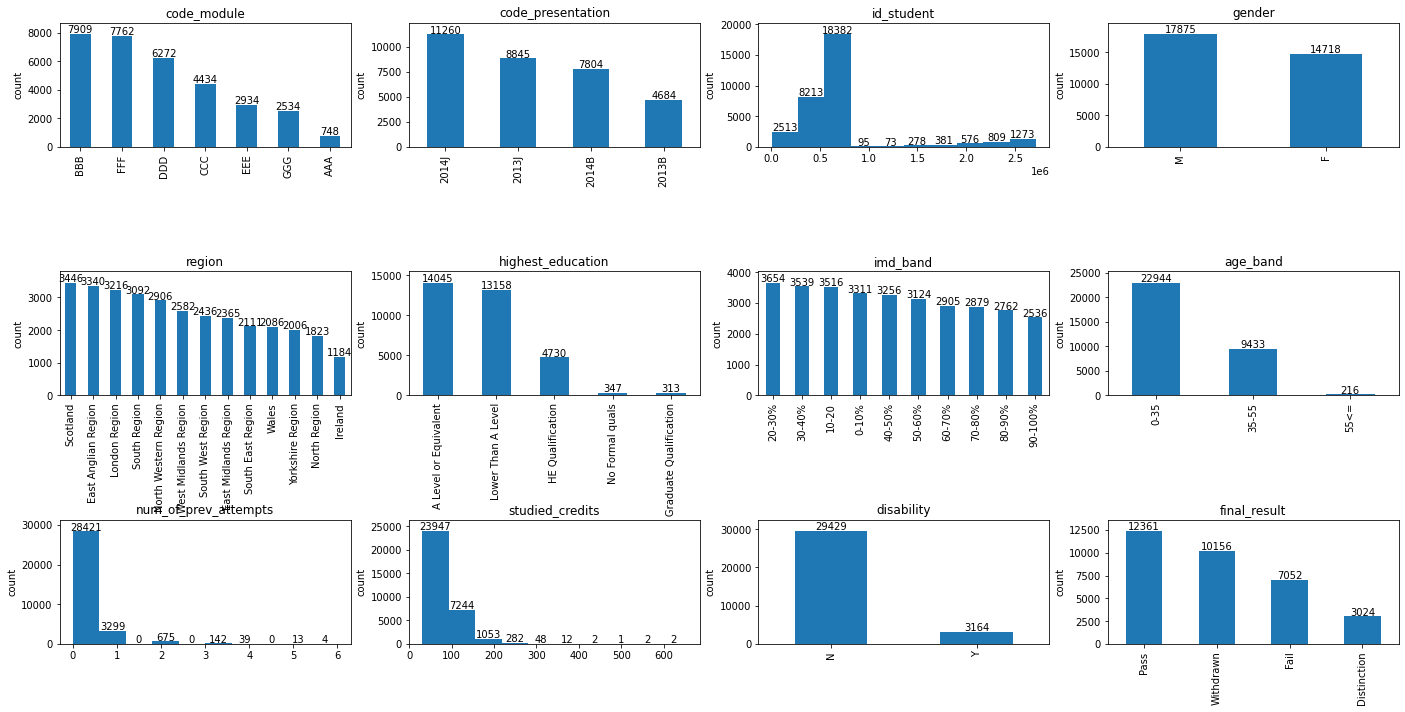

In [37]:
explore_df(student_info_raw)

Not sure how much, if anything, to do with `region`, unless we want to normalize by population (which sounds like way more trouble than it's worth.) I think the `final_result` chart is particularly informative - that's a LOT of students that withdrew. -Susannah

I find it interesting that there are more males than females in the dataset, I wonder how that compares to Open University's overall demographic. In the US I know that there are typically more females than males enrolled in higher education courses.

May want to bin `num_of_prev_attempts` into either no previous attempts or 1 or more previous attemtps.

There are clear outliers in terms of `highest_education`, `studied_credits`.

**To Do: Document definitions of `highest_education` or how it translates to US education system.**

### Exploration of student_registration data and notes

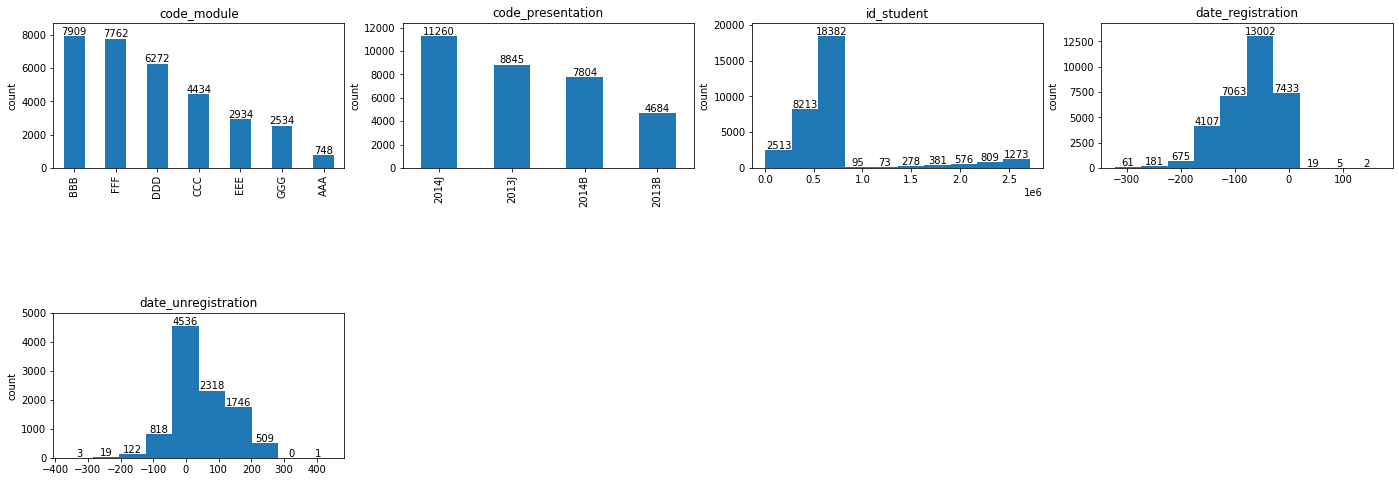

In [45]:
explore_df(student_registration_raw)

### Exploration of student_vle data and notes

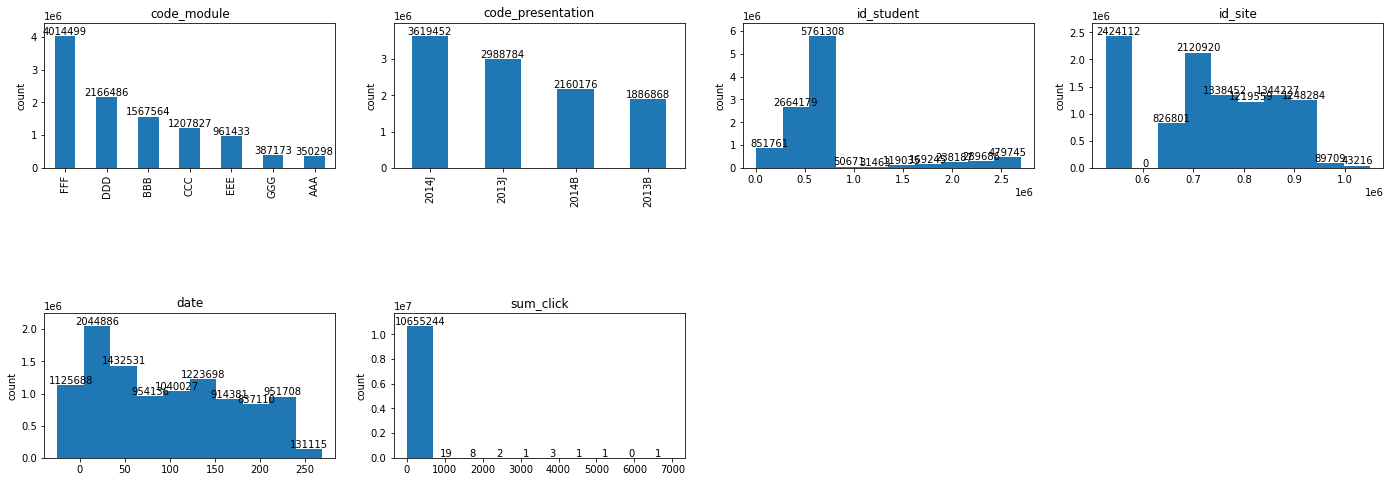

In [46]:
explore_df(student_vle_raw)

Clearly outliers in terms of `sum_click` which represents the number of clicks of a student with a specific material for a single day. Should investigate the distribution of the `sum_click`s less than 1000.

### Exploration of vle data and notes

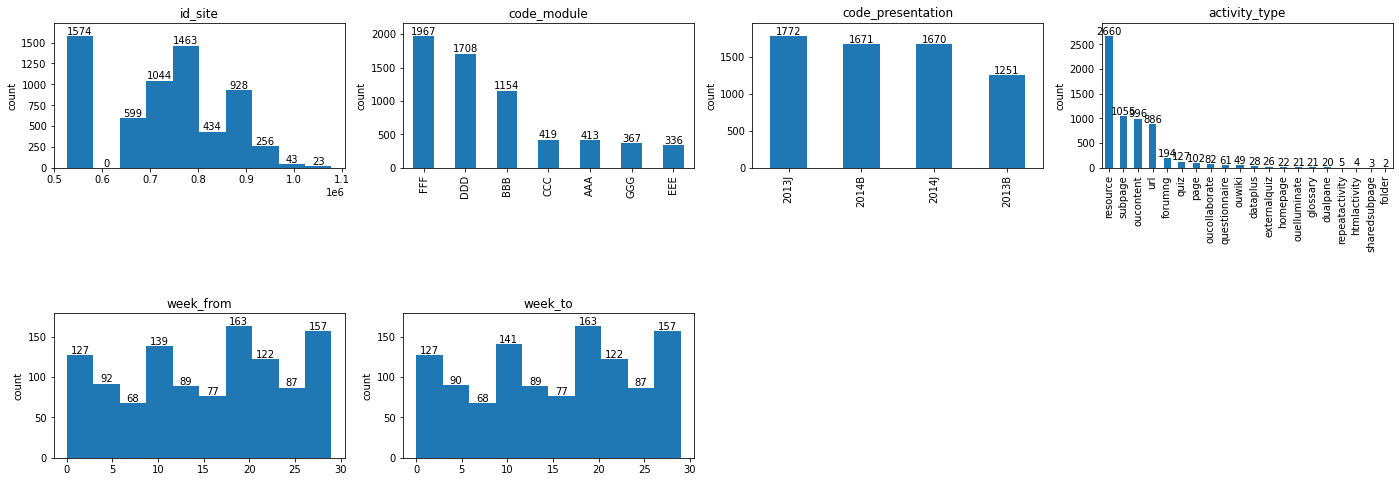

In [47]:
explore_df(vle_raw)

Many different types of activity types, and some are used much more often than others. Perhaps it might be useful to change them to use only the top 5 and then categorize the rest as "other"

## Identify Outliers

Outliers appear to exist in the following datasets and fields:

__student_vle__
- sum_click

__student_registration__
- date_unregistation

__student_info__
- studied_credits
- num_of_prev_attempts

This section is meant to serve as a quick investigation of these columns. Removal or handling of outliers will be done at a later point in the process (after train/test split).

444.0


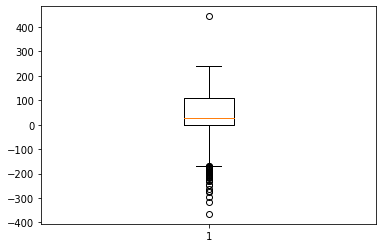

In [191]:
# date_unregistration
plt.boxplot(student_registration_raw['date_unregistration'].dropna())
print(np.max(student_registration_raw['date_unregistration']))

There appears to be a student who was able to unregister well after the course was finished. If we are predicting students who will drop the course, it is likely that we will only use drop dates that happened after a certain period (60 days)

{'whiskers': [<matplotlib.lines.Line2D at 0x24ce10532e0>,
 'caps': [<matplotlib.lines.Line2D at 0x24ce1053880>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ce1053130>],
 'medians': [<matplotlib.lines.Line2D at 0x24ce1053e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ce0d30130>],
 'means': []}

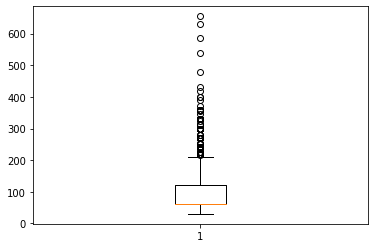

In [185]:
# studied_credits
# box plots give a quick visualization of outliers defined as Q3 + 1.5*IQR (inner quartile range) or Q1 - 1.5*IQR.
plt.boxplot(student_info_raw['studied_credits'])

0    28421
1     3299
2      675
3      142
4       39
5       13
6        4
Name: num_of_prev_attempts, dtype: int64

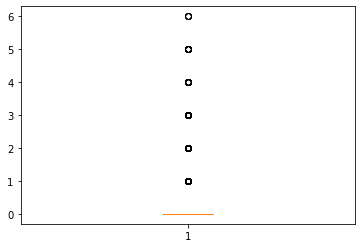

In [154]:
# num_prev_attempts
plt.boxplot(student_info_raw['num_of_prev_attempts'])
student_info_raw['num_of_prev_attempts'].value_counts()

Could break this down into 2-3 categories: "never taken before", "taken once before", "taken more than once before"

{'whiskers': [<matplotlib.lines.Line2D at 0x24cd4c5ed10>,
 'caps': [<matplotlib.lines.Line2D at 0x24cd4c5d330>,
 'boxes': [<matplotlib.lines.Line2D at 0x24cd4c5fa30>],
 'medians': [<matplotlib.lines.Line2D at 0x24cd4c5d8a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24cd4c5eef0>],
 'means': []}

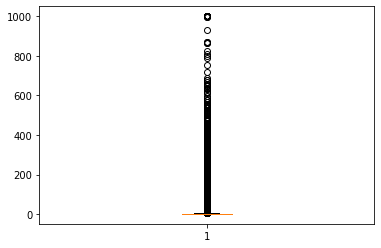

In [157]:
plt.boxplot(student_vle_raw['sum_click'])


Hmm... with this many outliers, this looks like we could log transform this to get a better idea of what the underlying data might look like

(array([5.113910e+06, 2.894300e+06, 1.560092e+06, 7.030350e+05,
        2.640680e+05, 8.865800e+04, 2.749700e+04, 3.161000e+03,
        4.760000e+02, 8.300000e+01]),
 array([0.        , 0.69077553, 1.38155106, 2.07232658, 2.76310211,
        3.45387764, 4.14465317, 4.8354287 , 5.52620422, 6.21697975,
        6.90775528]),
 <BarContainer object of 10 artists>)

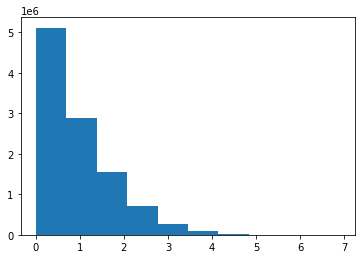

In [165]:
plt.hist(np.log(student_vle_raw['sum_click']))

It looks like logging this feature may be of use to prevent high numbers of clicks from creating irregular predictions.
Similarly, clipping the values will likely be necessary (especially if not taking logs of clicks).

Number of outliers (log):  684367
Outlier minimum (not log):  11.0
Number of total click records:  10655280
% outliers: 0.06422796960755607


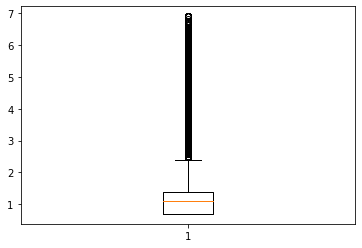

In [168]:
# Let's look at 
plt.boxplot(np.log1p(student_vle_raw['sum_click']))

arr1= np.log1p(student_vle_raw['sum_click'])
q1 = np.quantile(arr1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
outliers = np.expm1(outliers)
#print('The following are the outliers in the boxplot:{}'.format(outliers))
print("Number of outliers (log): ", len(outliers)) #684K
print("Outlier minimum (not log): ",min(outliers))
print("Number of total click records: ",len(student_vle_raw['sum_click'])) #10655K
print("% outliers:",len(outliers)/len(student_vle_raw['sum_click']))

Another way that might be useful is to aggregate click amounts not by day but by week. This may give a better indication of how regularly (or irregularly) students are engaging with the material.

In [176]:
# Let's look at the percent of total clicks for the top 20 values of sum_click
df_ = student_vle_raw['sum_click'].value_counts()
df_ = df_.reset_index()
for i in range(20):
   print("number of clicks:", df_.iloc[i]['index'], "\t% of total:", np.round(df_.iloc[i]['sum_click']/len(student_vle_raw['sum_click'])*100,1))


number of clicks: 1 	% of total: 48.0
number of clicks: 2 	% of total: 18.1
number of clicks: 3 	% of total: 9.1
number of clicks: 4 	% of total: 5.8
number of clicks: 5 	% of total: 3.9
number of clicks: 6 	% of total: 2.9
number of clicks: 7 	% of total: 2.1
number of clicks: 8 	% of total: 1.6
number of clicks: 9 	% of total: 1.2
number of clicks: 10 	% of total: 1.0
number of clicks: 11 	% of total: 0.8
number of clicks: 12 	% of total: 0.7
number of clicks: 13 	% of total: 0.5
number of clicks: 14 	% of total: 0.5
number of clicks: 15 	% of total: 0.4
number of clicks: 16 	% of total: 0.3
number of clicks: 17 	% of total: 0.3
number of clicks: 18 	% of total: 0.2
number of clicks: 19 	% of total: 0.2
number of clicks: 20 	% of total: 0.2


## Identify Correlations between attributes

## Feature Engineering Investigation